Missing values per column:
FailureMode    0
τ/fc           0
θu             0
M/Vlw          0
lw/tw          0
              ..
Force4         0
Moment1        0
Moment2        0
Moment3        0
Moment4        0
Length: 67, dtype: int64
Numeric columns used for correlation:
['FailureMode', 'τ/fc', 'θu', 'M/Vlw', 'lw/tw', 'ρvwFy,vw/fc', 'ρhwFy,vw/fc', 'ρvcFy,vc/fc', 'ρhcFy,hc/fc', 'P/fcAg', 'Ab/Ag', 'Vtest/Ag/sqrt(fc)', 'V@M/Vn_GB', 'V@M/Vn_ACI', 'V@M/Vtest', 'Vn_GB/Vtest', 'Vn_ACI/Vtest', 'Vtest', 'Vn_ACI', 'Vn_GB', 'alpha_c', 'lamda', 'N', 'Vc', 'Vs', 'P', 'fc', 'ft', 'alpha1', 'beta1', 'lw', "as'", 'lw0', 'tw', 'h', 'Aw', 'A', 'Ag', 'Fy,hw', 'Fy,vw', 'Fy,vc', 'ρvw', 'ρhw', 'V@moment', 'ForceEquilibrium', 'Moment', 'x_real', 'eps_cu', 'Ec', 'Es', 'DRein.1', 'DRein.2', 'DRein.3', 'DRein.4', 'Area1', 'Area2', 'Area3', 'Area4', 'Force1', 'Force2', 'Force3', 'Force4', 'Moment1', 'Moment2', 'Moment3', 'Moment4']


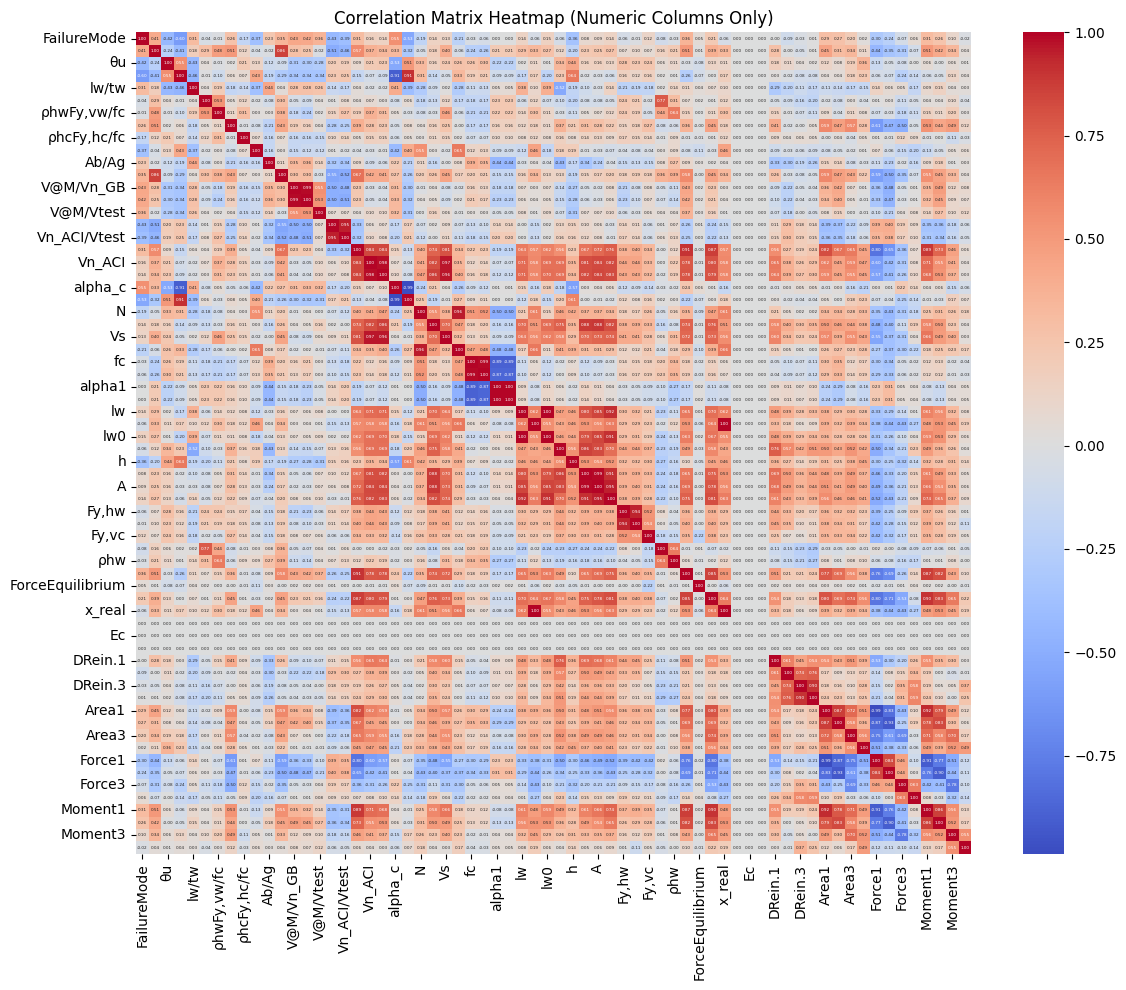

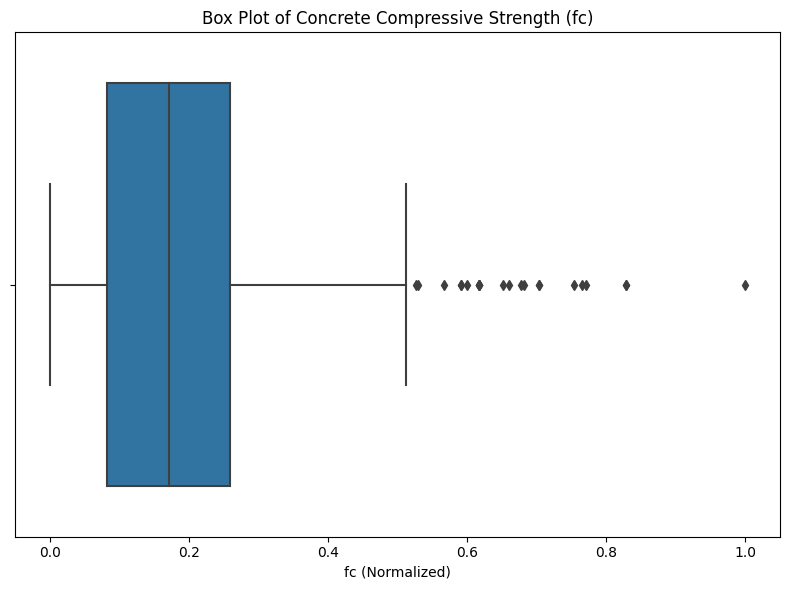

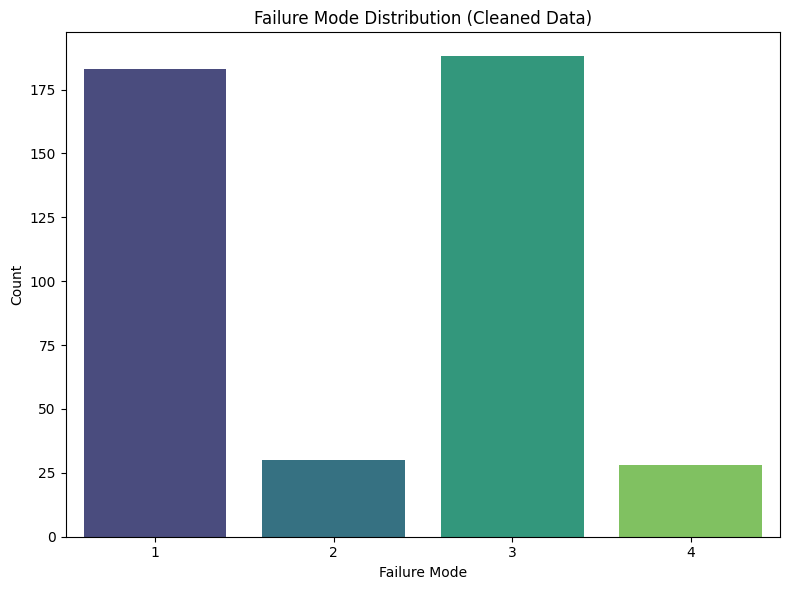

In [3]:
# This is a sample Python script.

# Press Shift+F10 to execute it or replace it with your code.
# Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

import pandas as pd

# 加载数据集

#df = pd.read_excel(file_path, sheet_name='RP1v16_Column_Data')
#pd.read_excel("/kaggle/input/dataset/Copy of RC_Shear_Wall_Database_20240514.xlsx",  sheet_name="Database",header=[2, 3])


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the normalized dataset (after data cleaning)

df_norm = pd.read_csv('/kaggle/input/normalized-dataset/normalized_dataset.csv', index_col=0)



# Print missing values and list numeric columns
print("Missing values per column:")
print(df_norm.isnull().sum())

numeric_cols = df_norm.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns used for correlation:")
print(numeric_cols)


corr_matrix = df_norm[numeric_cols].corr()
corr_matrix = corr_matrix.replace([np.inf, -np.inf], np.nan).fillna(0)

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f",annot_kws={"fontsize": 3})
plt.title("Correlation Matrix Heatmap (Numeric Columns Only)")
plt.tight_layout()
plt.savefig("heatmap_cleaned.png")
plt.show()




# --- Box Plot for 'fc' (Concrete Compressive Strength) ---
if 'fc' in df_norm.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df_norm['fc'])
    plt.title("Box Plot of Concrete Compressive Strength (fc)")
    plt.xlabel("fc (Normalized)")
    plt.tight_layout()
    plt.savefig("boxplot_fc.png")
    plt.show()

# --- Failure Mode Distribution ---
if 'FailureMode' in df_norm.columns:
    failure_counts = df_norm['FailureMode'].value_counts().sort_index()
    plt.figure(figsize=(8, 6))
    sns.barplot(x=failure_counts.index, y=failure_counts.values, palette="viridis")
    plt.xlabel("Failure Mode")
    plt.ylabel("Count")
    plt.title("Failure Mode Distribution (Cleaned Data)")
    plt.tight_layout()
    plt.savefig("failure_distribution.png")
    plt.show()